### Creating a model based on the MNST Dataset of Handwritten Digits

#### Step 1: Loading the dataset

In [30]:
from keras.datasets import mnist

#load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape)

(60000,)


### Step 2A: Examine the size and image dimensions 
- Check the number of samples,  dimensions and whether the images are color or greyscale
- Note from the above output that training data has ***60000*** samples and test data has ***10000*** samples
- Assume labels are appropriately sized
- image dimensions are 28x28  with no color channels i.e. no BGR but all greyscale

In [31]:
#print no of samples in X_train, X_test, y_train, y_test
print(f'Initial shape or dimensions of X_train: {X_train.shape}')
print(f'Number of samples in the training data: {len(X_train)}')
print(f'Number of Labels in our training data: {len(y_train)}')
print(f'Number of samples in the test data: {len(X_test)}')
print(f'Number of Labels in our test data: {len(y_test)}')
print()
print(f'Dimensions of X_train: {X_train[0].shape}')
print(f'Labels in y_train: {y_train.shape}')
print()
print(f'Dimensions of X_test: {X_test[0].shape}')
print(f'Labels in y_test: {y_test.shape}')

Initial shape or dimensions of X_train: (60000, 28, 28)
Number of samples in the training data: 60000
Number of Labels in our training data: 60000
Number of samples in the test data: 10000
Number of Labels in our test data: 10000

Dimensions of X_train: (28, 28)
Labels in y_train: (60000,)

Dimensions of X_test: (28, 28)
Labels in y_test: (10000,)


### Step 2B: Looking at images in the dataset
- using openCV
- Using Matplotlib

In [32]:
#visualising the information using openCV
import cv2
import numpy as np

#use openCV to display 6 random images from the dataset
for i in range(0,6):
  random_num = np.random.randint(0, len(X_train))
  img = X_train[random_num]
  window_name = f'Random Sample # {i}'
  cv2.imshow(window_name, img)
  cv2.waitKey(0)
  
cv2.destroyAllWindows()

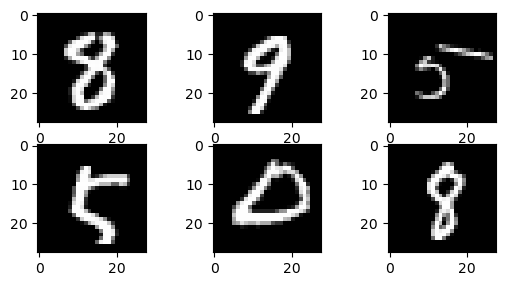

In [33]:
#Visualising the images using matplotlib
import matplotlib.pyplot as plt

#plot 6 images - arguments are nrows, ncols, index
#set the color map to geyscale since our image dataset is greyscale
plt.subplot(331)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(X_train))
plt.imshow(X_train[random_num], cmap = plt.get_cmap('gray'))

#display plots
plt.show()

### Step 3A - Prepare the dataset for training

In [34]:
#store number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

#get data in the right shape required by keras
#by adding a 4th dimension by changing the original image shape of (60000, 28, 28) to (60000, 28, 28, 1)
X_train  = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test  = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

#store the shape of a single image which will be the input shape for input layer
input_shape = (img_rows, img_cols, 1)

#change image type to float32 as Keras expects float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalise our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

#print to confirm changes
print(f'X_train shape: {X_train.shape}')
print(f'{X_train.shape[0]} train Samples')
print(f'{X_test.shape[0]} test Samples')


X_train shape: (60000, 28, 28, 1)
60000 train Samples
10000 test Samples


### Step 3B: OneHotEncode our labels (Y)

- ![OneHotEncode for Y labels](./images/OneHotEncoding_yLabels.png)

In [35]:
from tensorflow.keras.utils import to_categorical

#One Hot Encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count columns in the One Hot Encoded matrix
print(f"Number of classes: {y_test.shape[1]}")

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]
print(f'Number of pixels: {num_pixels}')

Number of classes: 10
Number of pixels: 784


#### Step 4: Create the Model
- We are constructing a simple but effective CNN that uses 32 filters of size 3 x 3
- we will add a 2nd CONV layer of 64 filters of the same size i.e. 3 x 2
- we will downsample our data to 2x2  by applying a dropout where P is set to 0.25
- we will flatten our Max Pool output that is connected to a Dense/FC  layer that has an output size of 128
- Here we apply a dropout where P is 0.5
- Thus 128 output is connected to another FC/Dense Layer that outputs to the 10 categorical units
![Model Illustration](./images/model_illustration.png)

In [36]:
#import required modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

#create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), 
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #o.25 is the value of p - dropout starts small and goes up to 0.5
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss ='categorical_crossentropy', 
              optimizer=SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

#### Step 5: Training the model
- Place the formatted data as the input and set the batch size, number of epochs
- store the model's training results for future visualisation
- Use Keras model.evaluate function to output the model's final performance by examining the Test Loss and Test Accuracy

In [37]:
batch_size = 32
epochs = 1

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs = epochs,
                    verbose =1,
                    validation_data= (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

1875/1875 [==============================] - 69s 37ms/step - loss: 0.5806 - accuracy: 0.8170 - val_loss: 0.1977 - val_accuracy: 0.9433
Test Loss: 0.19766037166118622
Test accuracy: 0.9433000087738037
